In [1]:
import skimage
from skimage import data,color,io, img_as_ubyte, measure, filters
from skimage.feature import canny
from skimage.transform import hough_ellipse, hough_circle, hough_circle_peaks, rescale,resize
from skimage.draw import ellipse_perimeter
from skimage import io, transform, feature, morphology
from skimage.morphology import erosion, dilation, opening, closing, white_tophat, skeletonize
from skimage.draw import circle_perimeter
from skimage.color import rgb2gray 
from scipy import ndimage as ndi
from skimage.filters import sobel

import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import trange, tqdm

import PIL
from PIL import Image, ImageDraw
from scipy import signal, ndimage
from math import sqrt, pi, cos, sin
from collections import defaultdict

from scipy import ndimage

In [2]:
hrasok = io.imread('1.jpg')
#moon = (rgb2gray(moonin)*255).astype(dtype=np.uint8)

Text(0.5, 1.0, 'Original hrasok')

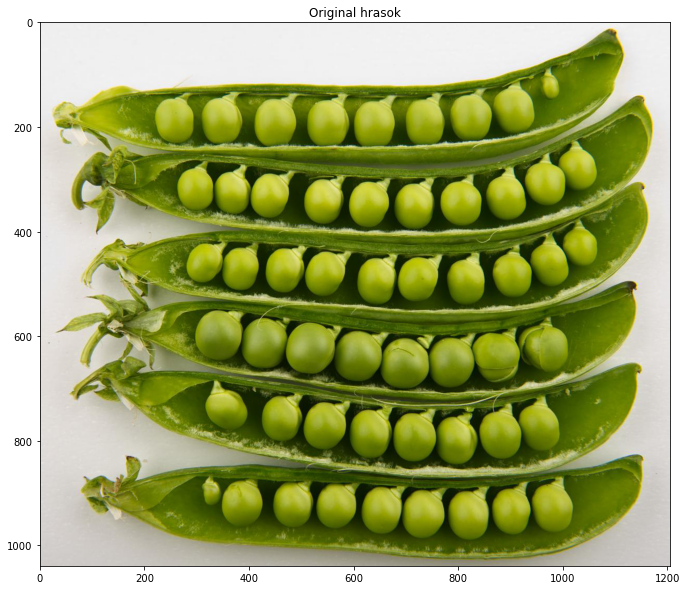

In [3]:
plt.figure(figsize=(20,10))
plt.imshow(hrasok,cmap='gray')
plt.title('Original hrasok')

In [4]:
hrasok2 = (rgb2gray(hrasok)*255).astype(dtype=np.uint8)

In [5]:
hrasok_resize = transform.resize(hrasok2,(int(1200/2), int(1200/2)))

In [6]:
io.imsave("hrasok.jpg",hrasok_resize)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


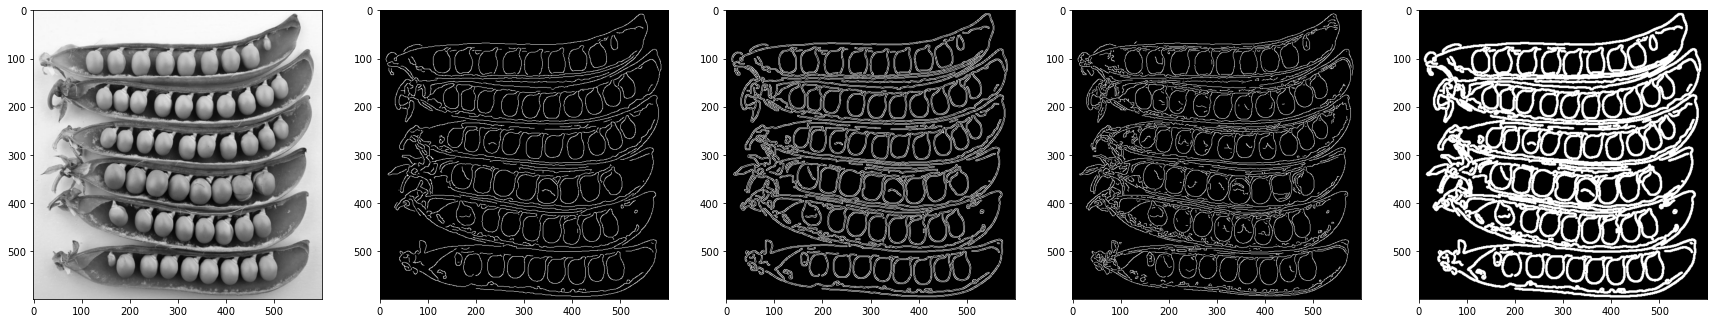

In [7]:
sobel_mask = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

edges = feature.canny(img_as_ubyte(hrasok_resize), sigma= 2, high_threshold= 50, low_threshold=10)

edges1 = canny(edges,sigma=1)
edges2 = canny(hrasok_resize)
edges3 = signal.convolve2d(edges1,sobel_mask)
diladed = dilation(edges1, morphology.disk(1))
plt.figure(figsize=(30,10))
plt.subplot(151)
plt.imshow(hrasok_resize,cmap='gray')
plt.subplot(152)
plt.imshow(edges,cmap='gray')
plt.subplot(153)
plt.imshow(edges1,cmap='gray')
plt.subplot(154)
plt.imshow(edges2,cmap='gray')
plt.subplot(155)
plt.imshow(diladed,cmap='gray')

In [62]:
input_image = Image.open("hrasok.jpg")

#Define for output crater
output_hrasok = Image.new("RGB", input_image.size)
output_hrasok.paste(input_image)
draw_result = ImageDraw.Draw(output_hrasok)

#Parametres for my crater
rmin = 19
rmax = 24
steps = 100
threshold = 0.4

#Search point with my parametres
points = []
for r in range(rmin, rmax):
    for t in range(steps):
        points.append((r, int(r * cos(2 * pi * t / steps)), int(r * sin(2 * pi * t / steps))))

acc = defaultdict(int)
for x in range(edges.shape[0]):
    for y in range(edges.shape[1]):
        if edges[x][y]:
            for r, dx, dy in points:
                a = x - dx
                b = y - dy
                acc[(a, b, r)] += 1

circles = []
for k, v in sorted(acc.items(), key=lambda i: -i[1]):
    x, y, r = k
    if v / steps >= threshold and all((x - xc) ** 2 + (y - yc) ** 2 > rc ** 2 for xc, yc, rc in circles):
        print(v / steps, x, y, r)
        circles.append((x, y, r))

for x, y, r in circles:
    draw_result.ellipse((x-r, y-r, x+r, y+r), outline=(255,0,0,0))


0.48 465 356 19
0.46 185 150 20
0.46 204 401 19
0.44 462 439 19
0.43 380 390 22
0.43 536 408 19
0.42 278 361 19
0.42 446 315 19
0.41 364 256 23
0.4 263 159 19
0.4 424 180 23
0.4 450 270 20
0.4 536 241 19


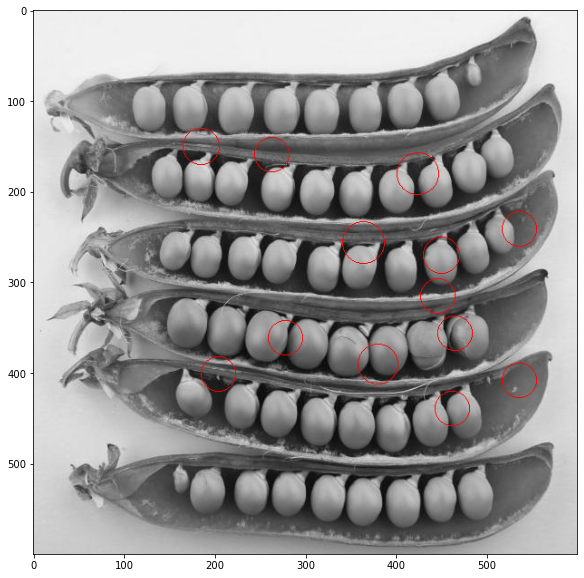

In [63]:
plt.figure(figsize=(15,10))
plt.imshow(output_hrasok,cmap='gray')